C:\Users\hp\AppData\Local\Temp\ipykernel_18336\801714335.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_18336\801714335.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
C:\Users\hp\AppData\Local\Temp\ipykernel_18336\801714335.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=[0], index_col=0)


TSLA data loaded. Shape: (2535, 5)
BND data loaded. Shape: (2535, 5)
SPY data loaded. Shape: (2535, 5)

--- TSLA BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2535 non-null   float64
 1   High    2535 non-null   float64
 2   Low     2535 non-null   float64
 3   Open    2535 non-null   float64
 4   Volume  2535 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.8+ KB
None
         count          mean           std           min           25%  \
Close   2535.0  1.319630e+02  1.209149e+02  9.578000e+00  1.896767e+01   
High    2535.0  1.349604e+02  1.237837e+02  1.033133e+01  1.927967e+01   
Low     2535.0  1.288378e+02  1.179966e+02  9.403333e+00  1.857533e+01   
Open    2535.0  1.320006e+02  1.210342e+02  9.488000e+00  1.890100e+01   
Volume  2535.0  1.141789e+08  7.332146e+07  1.062000e+07  6.908220e+0

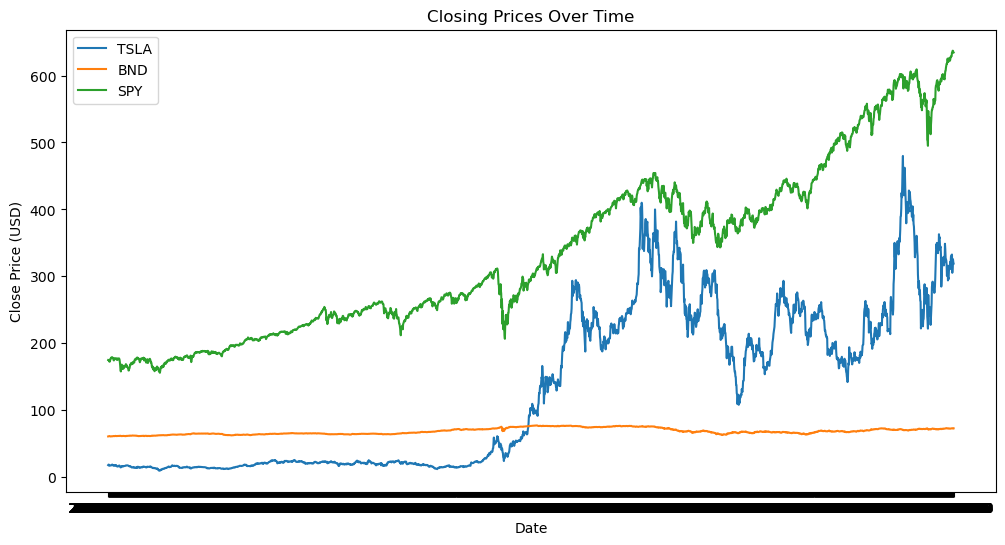


[EDA Insight] Long-term trends show TSLA high growth & volatility, BND stability, SPY moderate growth.

TSLA Daily Return Stats:
 count    2534.000000
mean        0.001828
std         0.037285
min        -0.210628
25%        -0.017368
50%         0.001261
75%         0.019718
max         0.226900
Name: Daily_Return, dtype: float64

BND Daily Return Stats:
 count    2534.000000
mean        0.000078
std         0.003460
min        -0.054385
25%        -0.001530
50%         0.000127
75%         0.001783
max         0.042201
Name: Daily_Return, dtype: float64

SPY Daily Return Stats:
 count    2534.000000
mean        0.000575
std         0.011491
min        -0.109424
25%        -0.003661
50%         0.000645
75%         0.005993
max         0.105019
Name: Daily_Return, dtype: float64


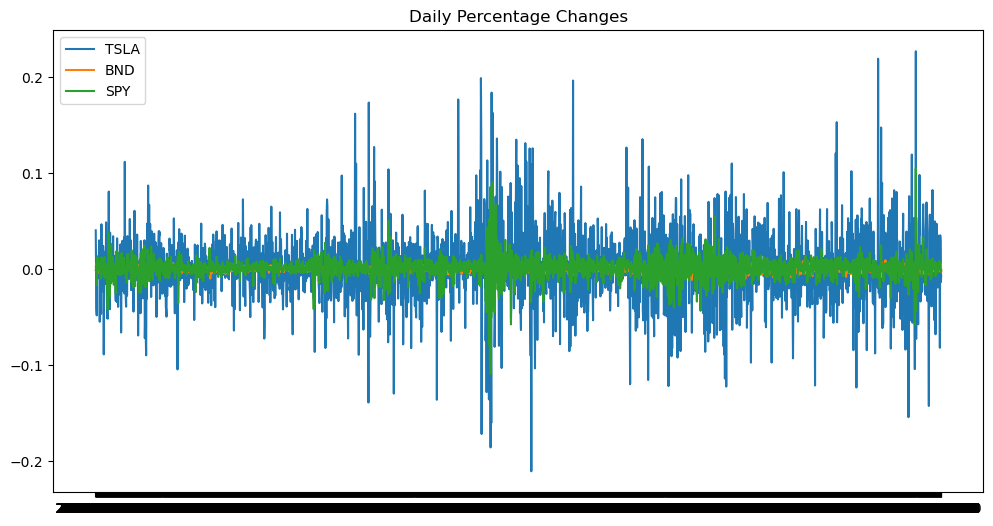


[EDA Insight] Daily returns reveal volatility spikes. TSLA is most volatile, BND least.


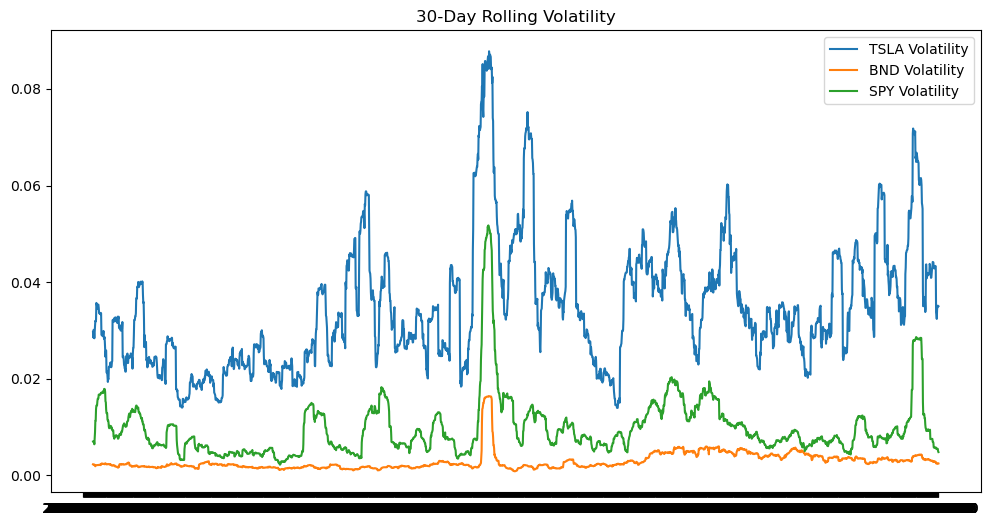


[EDA Insight] Rolling volatility highlights instability periods. TSLA > SPY > BND.

TSLA outliers (extreme 1% tails): 52 days detected.

BND outliers (extreme 1% tails): 52 days detected.

SPY outliers (extreme 1% tails): 52 days detected.

ADF Test for TSLA Closing Price:
ADF Statistic: -1.4188720053968258
p-value: 0.5731959514207231
[Non-Stationary] TSLA series likely needs differencing.

ADF Test for BND Closing Price:
ADF Statistic: -1.536253376482683
p-value: 0.5155072127584266
[Non-Stationary] BND series likely needs differencing.

ADF Test for SPY Closing Price:
ADF Statistic: 0.6908126549742479
p-value: 0.9896527257325969
[Non-Stationary] SPY series likely needs differencing.

TSLA Risk Metrics:
Annualized Mean Return: 46.07%
Annualized Volatility: 59.19%
Sharpe Ratio: 0.74
Value at Risk (95%): -5.47%

BND Risk Metrics:
Annualized Mean Return: 1.96%
Annualized Volatility: 5.49%
Sharpe Ratio: -0.01
Value at Risk (95%): -0.49%

SPY Risk Metrics:
Annualized Mean Return: 14.48%
An

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import os

# --- Load Data ---
data_folder = os.path.join("..", "data")
tickers = ["TSLA", "BND", "SPY"]
dfs = {}

for ticker in tickers:
    file_path = os.path.join(data_folder, f"{ticker}.csv")
    df = pd.read_csv(file_path, parse_dates=[0], index_col=0)

    # Remove any non-numeric rows (e.g., header info or 'Ticker')
    df = df[pd.to_numeric(df["Close"], errors="coerce").notnull()]

    # Convert all columns to numeric
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    dfs[ticker] = df
    print(f"{ticker} data loaded. Shape: {df.shape}")

# --- Basic Info ---
for ticker, df in dfs.items():
    print(f"\n--- {ticker} BASIC INFO ---")
    print(df.info())
    print(df.describe().T)

# --- Missing Values ---
for ticker, df in dfs.items():
    missing = df.isnull().sum()
    print(f"\nMissing values for {ticker}:")
    print(missing)
    if missing.sum() > 0:
        dfs[ticker] = df.interpolate()
        print(f"{ticker}: Missing values handled with interpolation.")

# --- Ensure Data Types ---
for ticker, df in dfs.items():
    print(f"{ticker} dtypes:\n{df.dtypes}")

# --- EDA: Closing Price Trends ---
plt.figure(figsize=(12, 6))
for ticker, df in dfs.items():
    plt.plot(df.index, df["Close"], label=ticker)
plt.legend()
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.show()
print("\n[EDA Insight] Long-term trends show TSLA high growth & volatility, BND stability, SPY moderate growth.")

# --- Daily Percentage Change ---
for ticker, df in dfs.items():
    df["Daily_Return"] = df["Close"].pct_change()
    print(f"\n{ticker} Daily Return Stats:\n", df["Daily_Return"].describe())

plt.figure(figsize=(12, 6))
for ticker, df in dfs.items():
    plt.plot(df.index, df["Daily_Return"], label=ticker)
plt.legend()
plt.title("Daily Percentage Changes")
plt.show()
print("\n[EDA Insight] Daily returns reveal volatility spikes. TSLA is most volatile, BND least.")

# --- Rolling Volatility ---
rolling_window = 30
plt.figure(figsize=(12, 6))
for ticker, df in dfs.items():
    rolling_vol = df["Daily_Return"].rolling(rolling_window).std()
    plt.plot(df.index, rolling_vol, label=f"{ticker} Volatility")
plt.legend()
plt.title(f"{rolling_window}-Day Rolling Volatility")
plt.show()
print("\n[EDA Insight] Rolling volatility highlights instability periods. TSLA > SPY > BND.")

# --- Outlier Detection ---
for ticker, df in dfs.items():
    q_low = df["Daily_Return"].quantile(0.01)
    q_high = df["Daily_Return"].quantile(0.99)
    outliers = df[(df["Daily_Return"] < q_low) | (df["Daily_Return"] > q_high)]
    print(f"\n{ticker} outliers (extreme 1% tails): {outliers.shape[0]} days detected.")

# --- Stationarity Test (ADF) ---
for ticker, df in dfs.items():
    result = adfuller(df["Close"].dropna())
    print(f"\nADF Test for {ticker} Closing Price:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print(f"[Stationary] {ticker} series is likely stationary.")
    else:
        print(f"[Non-Stationary] {ticker} series likely needs differencing.")

# --- Risk Metrics ---
risk_free_rate = 0.02  # 2% annualized
trading_days = 252

for ticker, df in dfs.items():
    mean_daily_return = df["Daily_Return"].mean()
    std_daily_return = df["Daily_Return"].std()
    sharpe_ratio = (mean_daily_return * trading_days - risk_free_rate) / (std_daily_return * np.sqrt(trading_days))
    var_95 = np.percentile(df["Daily_Return"].dropna(), 5)
    print(f"\n{ticker} Risk Metrics:")
    print(f"Annualized Mean Return: {mean_daily_return * trading_days:.2%}")
    print(f"Annualized Volatility: {std_daily_return * np.sqrt(trading_days):.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Value at Risk (95%): {var_95:.2%}")


